<a href="https://colab.research.google.com/github/Nio2002/-Nio2002-Python-Projects-MLOPS-DEVLOPS-AL-ML-/blob/Nio2002-Week3/Week3Assignment(IndianRain).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving rain-agriculture.csv to rain-agriculture (1).csv


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('/content/rain-agriculture.csv')

In [6]:
df.head()

,State Name,Year,Dist Code,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),...,FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha),subdivision,YEAR,JUN,JUL,AUG,SEP
0,andhra pradesh,1966,49.0,1.0,218.272727,292.181818,1345.728182,0.227273,0.054545,128.417273,...,20.699091,0.017273,0.892727,11.688182,andhra pradesh,1966,72.333333,197.566667,145.966667,162.266667
1,andhra pradesh,1967,49.0,1.0,220.181818,302.090909,1337.355455,0.236364,0.045455,34.632727,...,19.797273,0.022727,0.960000,10.838182,andhra pradesh,1967,99.400000,205.100000,104.933333,134.900000
2,andhra pradesh,1968,49.0,1.0,203.527273,250.363636,1212.896364,0.327273,0.090909,146.831818,...,20.502727,0.012727,0.899091,9.487273,andhra pradesh,1968,61.366667,129.666667,28.900000,177.466667
3,andhra pradesh,1969,49.0,1.0,227.118182,280.509091,1268.754545,0.318182,0.081818,174.282727,...,20.974545,0.013636,1.020000,11.616364,andhra pradesh,1969,78.233333,168.800000,137.033333,122.566667
4,andhra pradesh,1970,49.0,1.0,225.745455,312.245455,1361.693636,0.245455,0.209091,549.586364,...,20.752727,0.011818,1.006364,10.207273,andhra pradesh,1970,125.833333,121.433333,242.300000,140.200000


In [7]:
 print("=== Data Overview ===")

=== Data Overview ===


In [8]:
# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [9]:
df

,State Name,Year,Dist Code,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),...,FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha),subdivision,YEAR,JUN,JUL,AUG,SEP
0,andhra pradesh,1966,49.000000,1.000000,218.272727,292.181818,1345.728182,0.227273,0.054545,128.417273,...,20.699091,0.017273,0.892727,11.688182,andhra pradesh,1966,72.333333,197.566667,145.966667,162.266667
1,andhra pradesh,1967,49.000000,1.000000,220.181818,302.090909,1337.355455,0.236364,0.045455,34.632727,...,19.797273,0.022727,0.960000,10.838182,andhra pradesh,1967,99.400000,205.100000,104.933333,134.900000
2,andhra pradesh,1968,49.000000,1.000000,203.527273,250.363636,1212.896364,0.327273,0.090909,146.831818,...,20.502727,0.012727,0.899091,9.487273,andhra pradesh,1968,61.366667,129.666667,28.900000,177.466667
3,andhra pradesh,1969,49.000000,1.000000,227.118182,280.509091,1268.754545,0.318182,0.081818,174.282727,...,20.974545,0.013636,1.020000,11.616364,andhra pradesh,1969,78.233333,168.800000,137.033333,122.566667
4,andhra pradesh,1970,49.000000,1.000000,225.745455,312.245455,1361.693636,0.245455,0.209091,549.586364,...,20.752727,0.011818,1.006364,10.207273,andhra pradesh,1970,125.833333,121.433333,242.300000,140.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,west bengal,2015,810.533333,13.000000,368.264000,1063.217333,2806.663333,22.658000,52.566000,2066.367333,...,113.737333,32.827333,0.000000,0.233333,west bengal,2015,405.150000,499.500000,461.750000,246.400000
932,west bengal,2016,810.533333,13.000000,347.467333,1007.088000,2842.659333,21.321333,57.235333,2369.040667,...,109.004667,27.564667,0.000000,0.233333,west bengal,2016,347.700000,508.250000,312.650000,354.200000
933,west bengal,2017,810.533333,13.000000,353.846000,1043.929333,2880.750000,7.734000,23.942000,2528.984667,...,107.624667,28.612000,0.000000,0.233333,west bengal,2017,284.850000,479.350000,500.250000,279.800000
934,jharkhand,1995,335.030456,10.491329,164.332063,283.694734,1611.377169,64.688199,170.809047,1382.508923,...,20.956663,2.915750,1.074807,17.346942,jharkhand,1995,134.800000,311.300000,301.400000,395.300000


In [11]:
def load_data('df')

SyntaxError: invalid syntax (ipython-input-11-1038860921.py, line 1)

In [12]:
def load_data(df):
    """Load the dataset and perform initial inspection"""

    print("=== Data Overview ===")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())

    return df

In [13]:
def clean_data(df):
    """Clean the dataset by handling missing values, duplicates, and outliers"""
    print("\n=== Data Cleaning ===")

In [14]:
 # Handle missing values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
       df[col].fillna(df[col].mean(), inplace=True)
       print(f"Filled missing values in {col} with mean")

In [15]:
# Remove duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]
print(f"\nRemoved {initial_rows - final_rows} duplicate rows")


Removed 0 duplicate rows


In [16]:
# Handle outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
if not outliers.empty:
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = df[col].median()
    print(f"Replaced outliers in {col} with median")

Replaced outliers in SEP with median


In [17]:
# Standardize state names
if 'State' in df.columns:
    df['State'] = df['State'].str.title().str.strip()

print("\nCleaned data summary:")
print(df.describe())


Cleaned data summary:
              Year   Dist Code  State Code  RICE AREA (1000 ha)  \
count   936.000000  936.000000  936.000000           936.000000   
mean   1991.500000  368.783840    9.768144           142.288064   
std      15.016355  313.408031    5.541112           118.121417   
min    1966.000000   25.000000    1.000000            -1.000000   
25%    1978.750000  107.500000    5.000000            38.944643   
50%    1991.500000  197.395963    9.500000            98.698913   
75%    2004.250000  656.200000   15.000000           239.806818   
max    2017.000000  914.166667   19.000000           410.030667   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
count                   936.000000              936.000000   
mean                    259.990342             1609.671215   
std                     253.117563              834.974147   
min                      -1.000000               -1.000000   
25%                      58.951625              991.830545   
5

In [18]:
def perform_eda(df):
    """Perform exploratory data analysis and create visualizations"""
    print("\n=== Exploratory Data Analysis ===")

In [19]:
def get_state_colors(states):
    """Generate a distinct color for each state"""
    # Use a colormap with enough distinct colors
    cmap = plt.cm.get_cmap('tab20', len(states))
    colors = [cmap(i) for i in range(len(states))]
    return dict(zip(states, colors))

In [20]:
def perform_eda(df):
    """Perform exploratory data analysis with distinct state colors"""
    print("\n=== Enhanced Data Visualization ===")

In [22]:
# Get unique states and assign colors
states = df['State Name'].unique()
state_colors = get_state_colors(states)

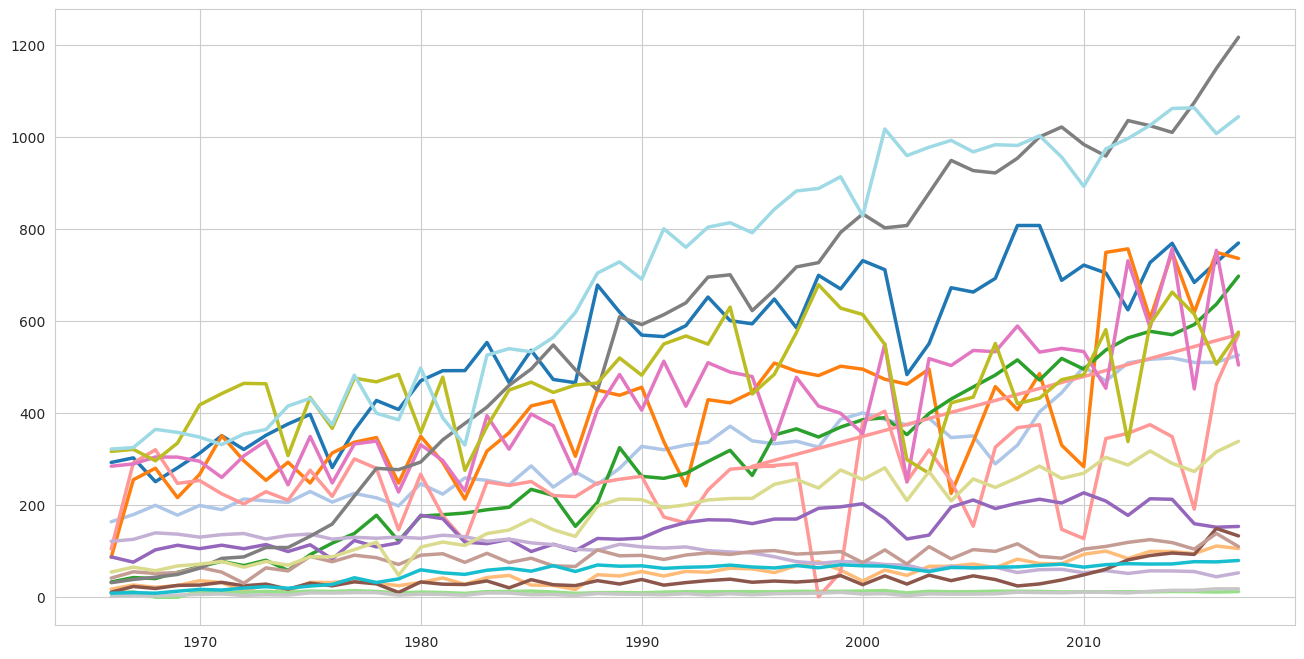

In [23]:
 # 1. Annual Trends for Rice Production (Enhanced)
plt.figure(figsize=(16, 8))
for state in states:
    state_data = df[df['State Name'] == state]
    plt.plot(state_data['Year'], state_data['RICE PRODUCTION (1000 tons)'],
        label=state, color=state_colors[state], linewidth=2.5)

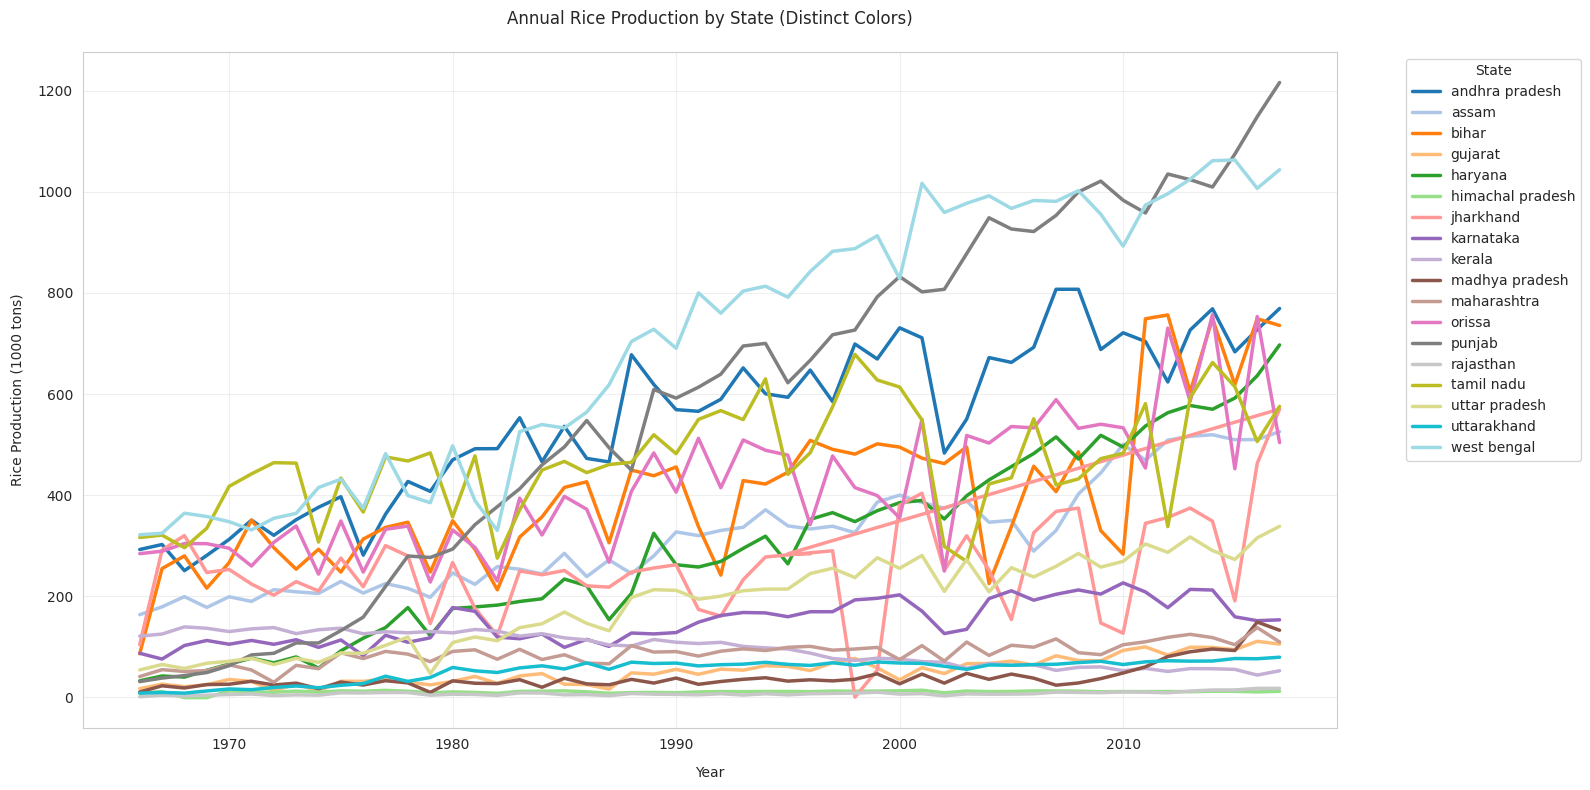

In [25]:
 # 1. Annual Trends for Rice Production (Enhanced)
plt.figure(figsize=(16, 8))
for state in states:
    state_data = df[df['State Name'] == state]
    plt.plot(state_data['Year'], state_data['RICE PRODUCTION (1000 tons)'],
        label=state, color=state_colors[state], linewidth=2.5)
plt.title('Annual Rice Production by State (Distinct Colors)', pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Rice Production (1000 tons)', labelpad=10)
plt.grid(True, alpha=0.3)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

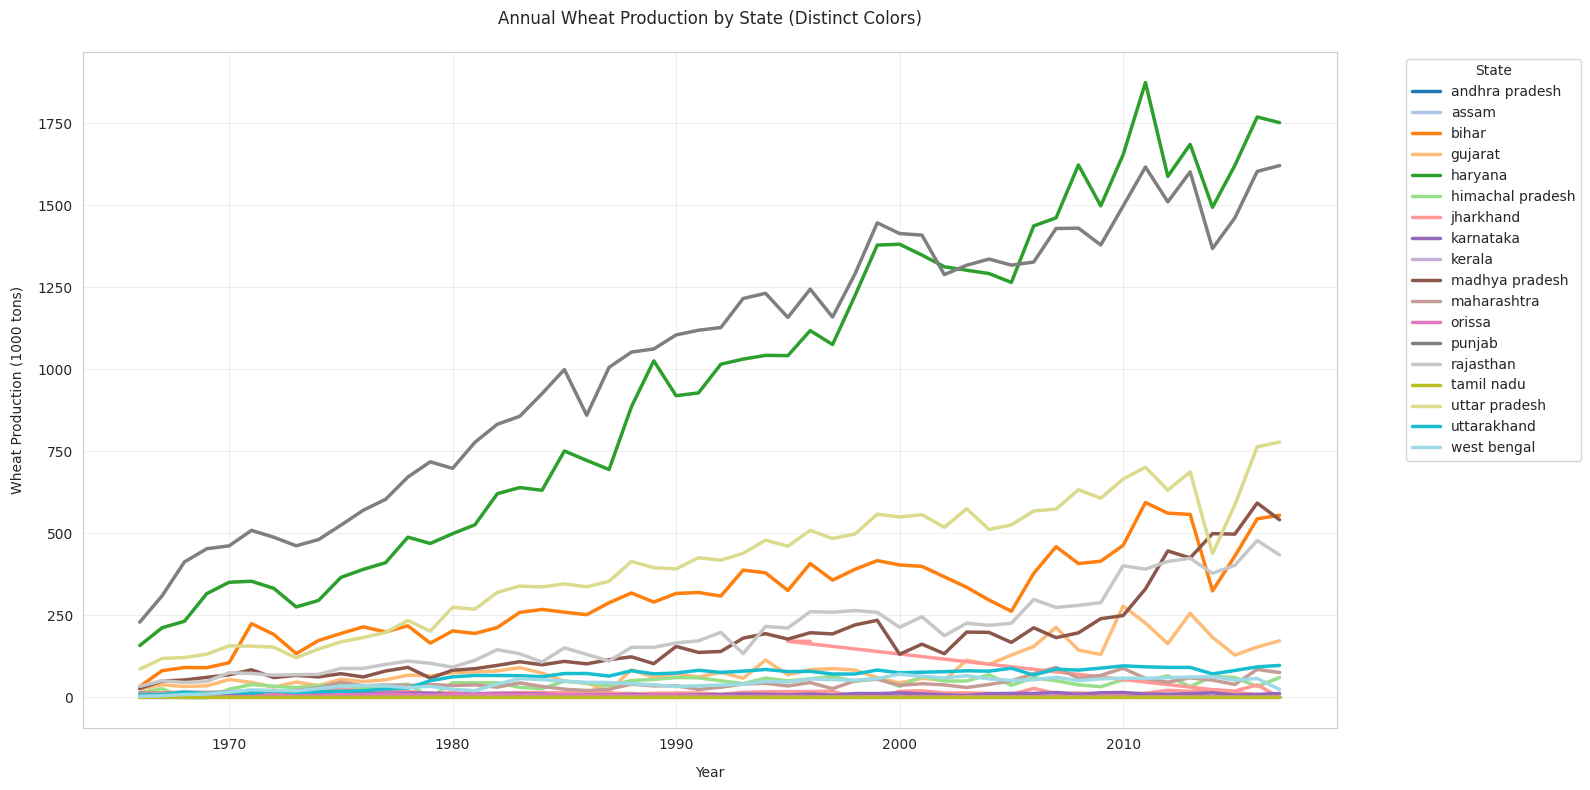

In [30]:
 # 2. Annual Trends for Wheat Production (Enhanced)
plt.figure(figsize=(16, 8))
for state in states:
    state_data = df[df['State Name'] == state]
    plt.plot(state_data['Year'], state_data['WHEAT PRODUCTION (1000 tons)'],
        label=state, color=state_colors[state], linewidth=2.5)

plt.title('Annual Wheat Production by State (Distinct Colors)', pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Wheat Production (1000 tons)', labelpad=10)
plt.grid(True, alpha=0.3)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

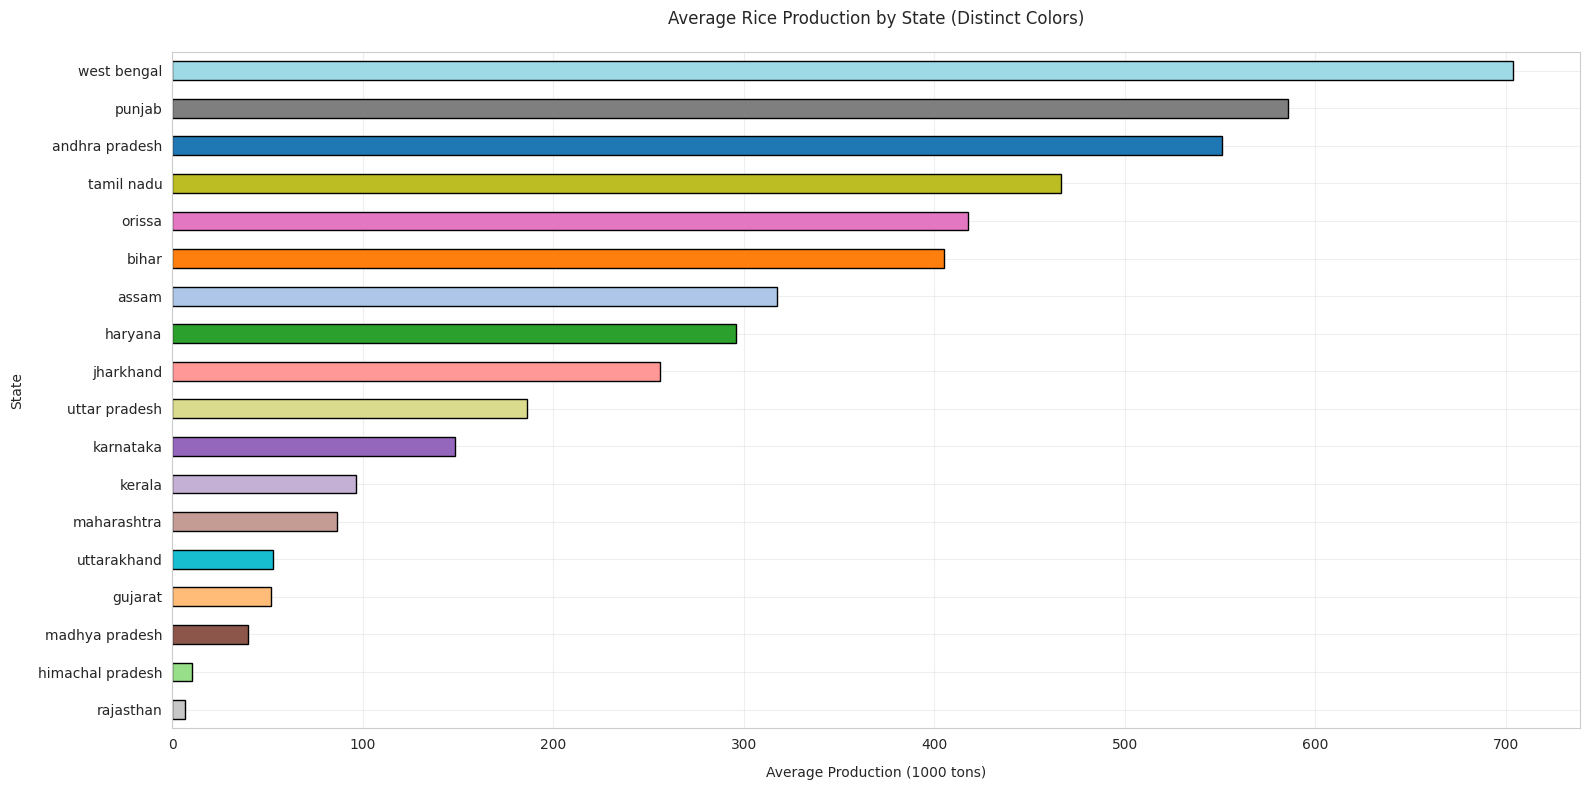

In [32]:
 # 3. State-wise Comparison (Bar Plot)
plt.figure(figsize=(16, 8))
avg_production = df.groupby('State Name')['RICE PRODUCTION (1000 tons)'].mean().sort_values()
colors = [state_colors[state] for state in avg_production.index]
avg_production.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Average Rice Production by State (Distinct Colors)', pad=20)
plt.xlabel('Average Production (1000 tons)', labelpad=10)
plt.ylabel('State', labelpad=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

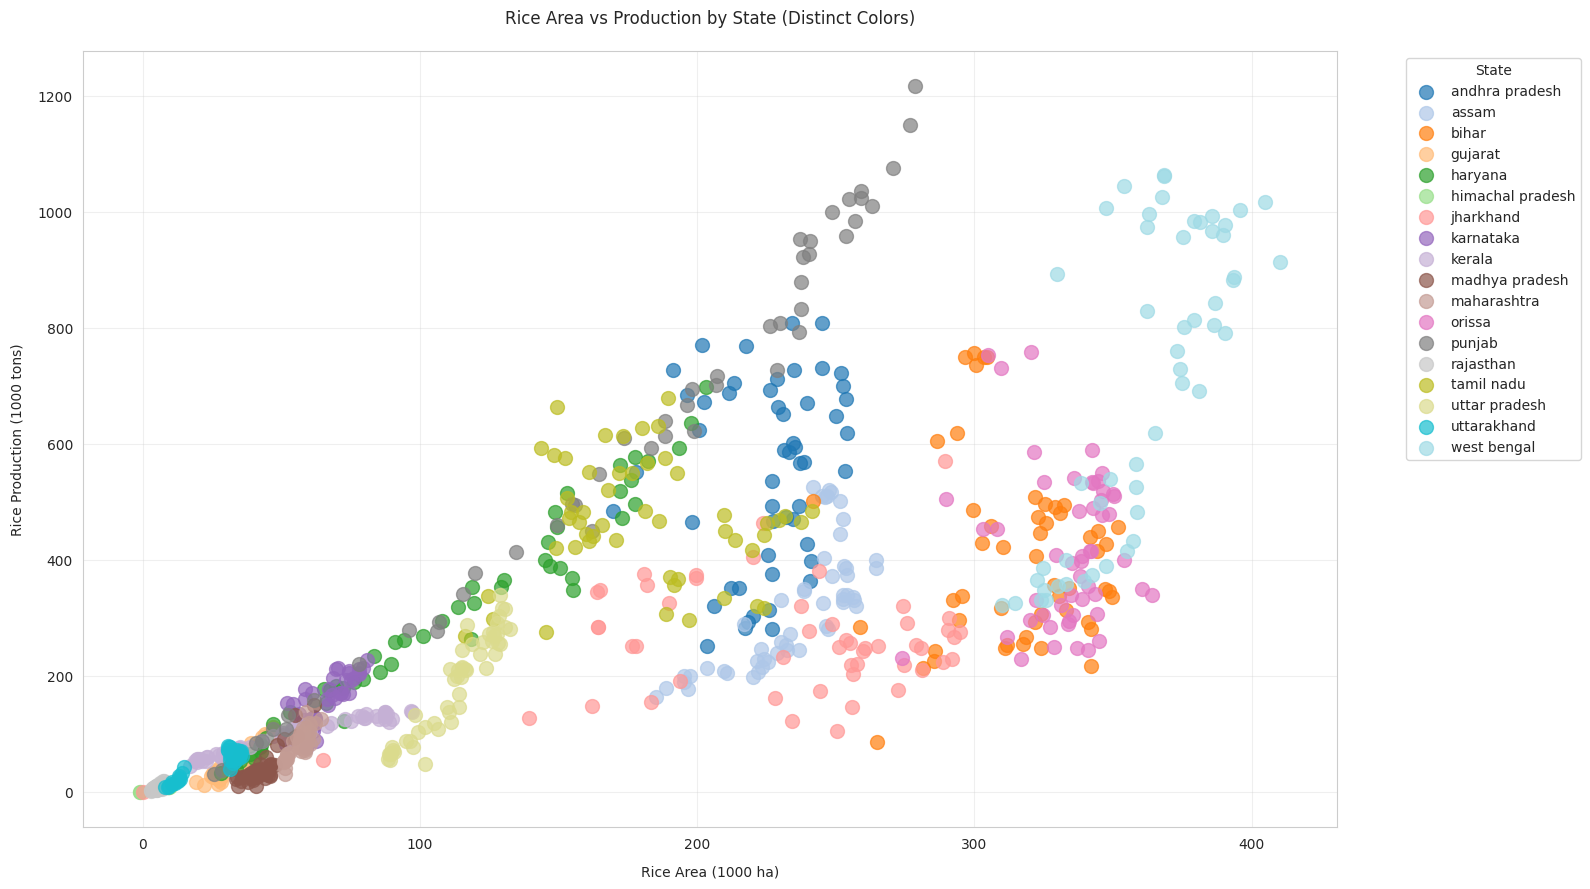

In [33]:
# 4. Scatter Plot with State Colors
plt.figure(figsize=(16, 9))
for state in states:
    state_data = df[df['State Name'] == state]
    plt.scatter(state_data['RICE AREA (1000 ha)'],
        state_data['RICE PRODUCTION (1000 tons)'],
        color=state_colors[state], label=state, s=100, alpha=0.7)

plt.title('Rice Area vs Production by State (Distinct Colors)', pad=20)
plt.xlabel('Rice Area (1000 ha)', labelpad=10)
plt.ylabel('Rice Production (1000 tons)', labelpad=10)
plt.grid(True, alpha=0.3)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

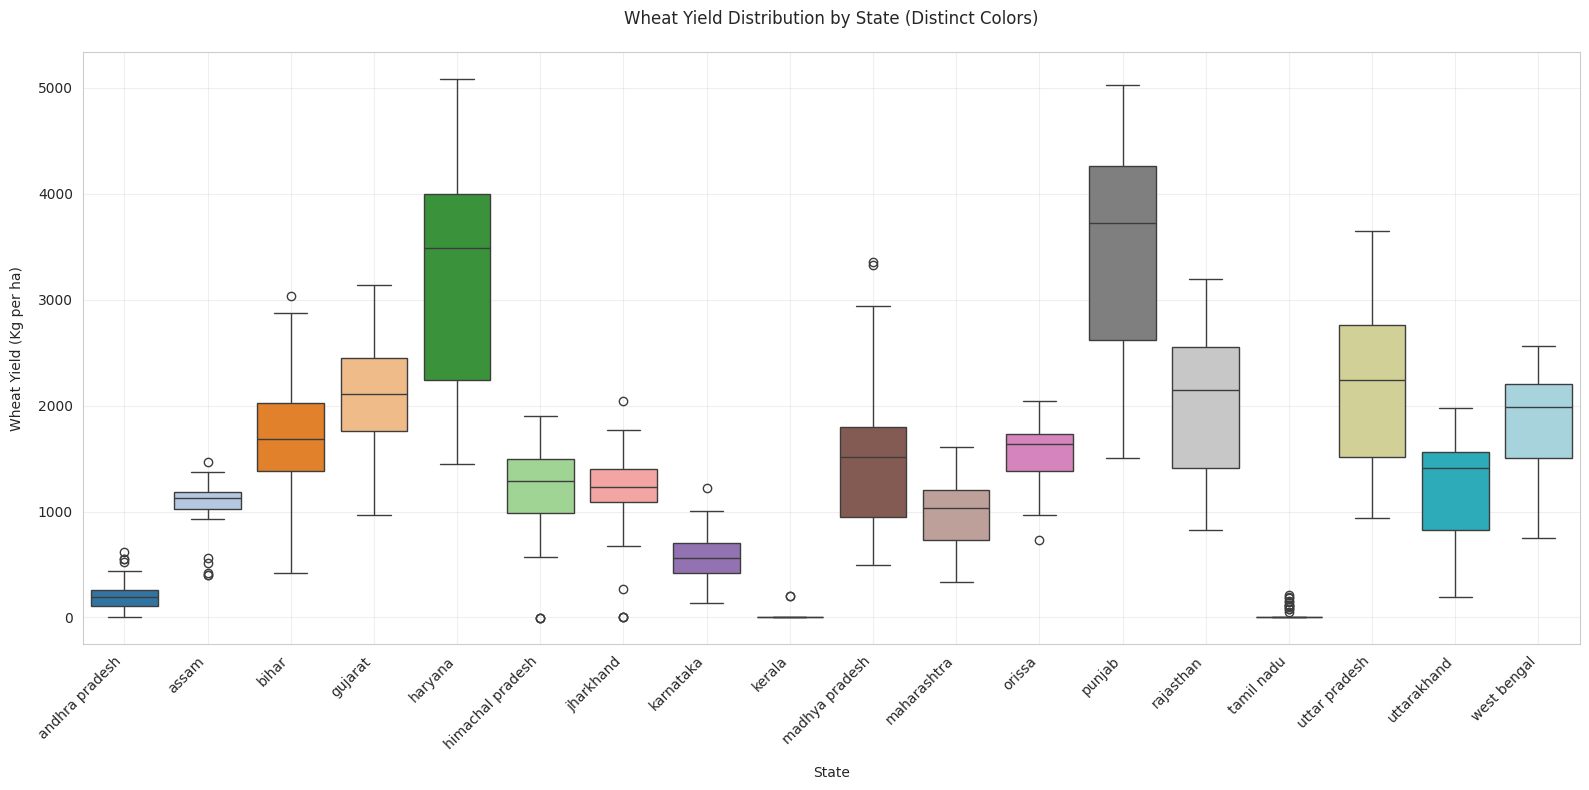

In [34]:
 # 5. Boxplot with State Colors
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='State Name', y='WHEAT YIELD (Kg per ha)',
    palette=state_colors.values())
plt.title('Wheat Yield Distribution by State (Distinct Colors)', pad=20)
plt.xlabel('State', labelpad=10)
plt.ylabel('Wheat Yield (Kg per ha)', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
# Main execution
if __name__ == "__main__":
    # Replace with your actual file path
    file_path = "/content/rain-agriculture.csv"  # Update this path to your CSV file

In [63]:
# Main execution
if __name__ == "__main__":
    # Replace with your actual file path
    file_path = "/content/rain-agriculture.csv"  # Update this path to your CSV file

    # Step 1: Load data
    df = load_data(file_path)

    # Step 2: Clean data
    cleaned_df = clean_data(df)

    # Step 3: Perform enhanced EDA with distinct colors
    perform_eda(cleaned_df)

    print("\nAnalysis complete with distinct state colors!")

=== Data Overview ===
Shape: (936, 85)

First 5 rows:
       State Name  Year  Dist Code  State Code  RICE AREA (1000 ha)  \
0  andhra pradesh  1966       49.0         1.0           218.272727   
1  andhra pradesh  1967       49.0         1.0           220.181818   
2  andhra pradesh  1968       49.0         1.0           203.527273   
3  andhra pradesh  1969       49.0         1.0           227.118182   
4  andhra pradesh  1970       49.0         1.0           225.745455   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                   292.181818             1345.728182              0.227273   
1                   302.090909             1337.355455              0.236364   
2                   250.363636             1212.896364              0.327273   
3                   280.509091             1268.754545              0.318182   
4                   312.245455             1361.693636              0.245455   

   WHEAT PRODUCTION (1000 tons)  WHEAT

In [62]:
# Step 1: Load the Data
def load_data(df):
    """Load the dataset and perform initial inspection"""
    df = pd.read_csv(df)
    print("=== Data Overview ===")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    return df